In [58]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import env

import mall_wrangle as m
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import viz_kmeans

from pydataset import data

np.set_printoptions(suppress=True)

# Clustering with the Iris Dataset



## 1. Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.


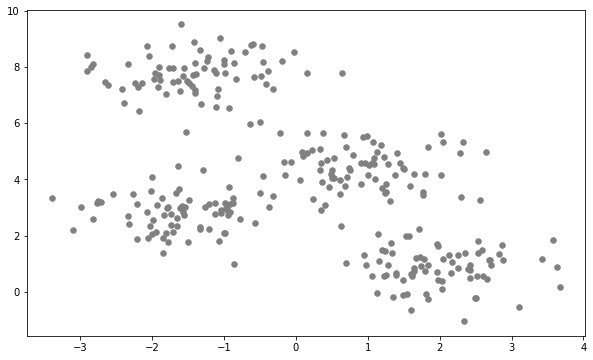

In [13]:
# visualize some data 
viz_kmeans.make_blob()

In [14]:
from sklearn.cluster import KMeans

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [15]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length']]
X.head(3)

,petal_length,sepal_length
1,1.4,5.1
2,1.4,4.9
3,1.3,4.7


In [16]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
X_scaled.head()

,petal_length,sepal_length
1,-1.340227,-0.900681
2,-1.340227,-1.143017
3,-1.397064,-1.385353
4,-1.283389,-1.506521
5,-1.340227,-1.021849


In [17]:
 #define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [18]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [19]:
# lets look at sample of 15 randomly selected rows in iris dataset
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
45,5.1,3.8,1.9,0.4,setosa,1
19,5.7,3.8,1.7,0.3,setosa,1
137,6.3,3.4,5.6,2.4,virginica,0
70,5.6,2.5,3.9,1.1,versicolor,2
10,4.9,3.1,1.5,0.1,setosa,1
59,6.6,2.9,4.6,1.3,versicolor,0
16,5.7,4.4,1.5,0.4,setosa,1
47,5.1,3.8,1.6,0.2,setosa,1
100,5.7,2.8,4.1,1.3,versicolor,2
28,5.2,3.5,1.5,0.2,setosa,1


In [20]:
print(kmeans)

KMeans(n_clusters=3)


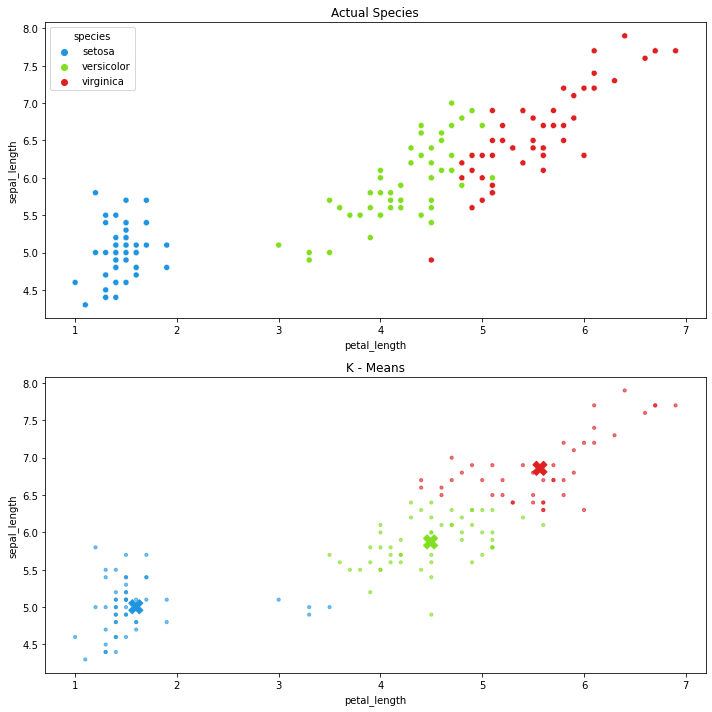

In [21]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [22]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 1.02844019,  1.22961906],
       [-1.22865676, -1.01511749],
       [ 0.41744409,  0.03665519]])

In [31]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_length,sepal_length
0,1.028440,1.229619
1,-1.228657,-1.015117
2,0.417444,0.036655


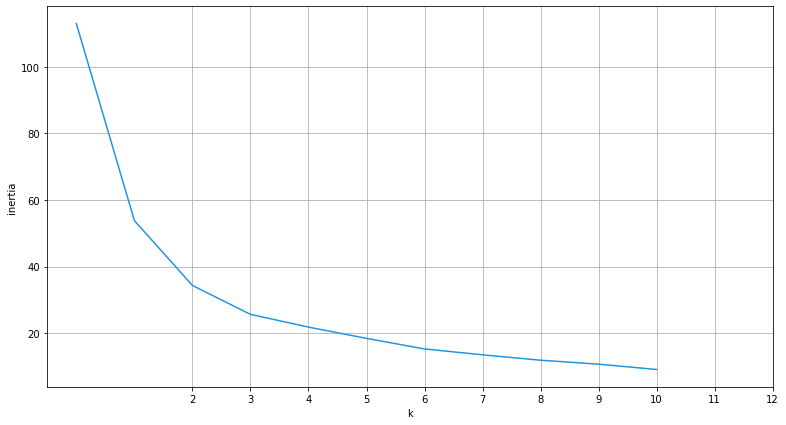

In [24]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

In [25]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [28]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)

In [29]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

<Figure size 1008x648 with 0 Axes>

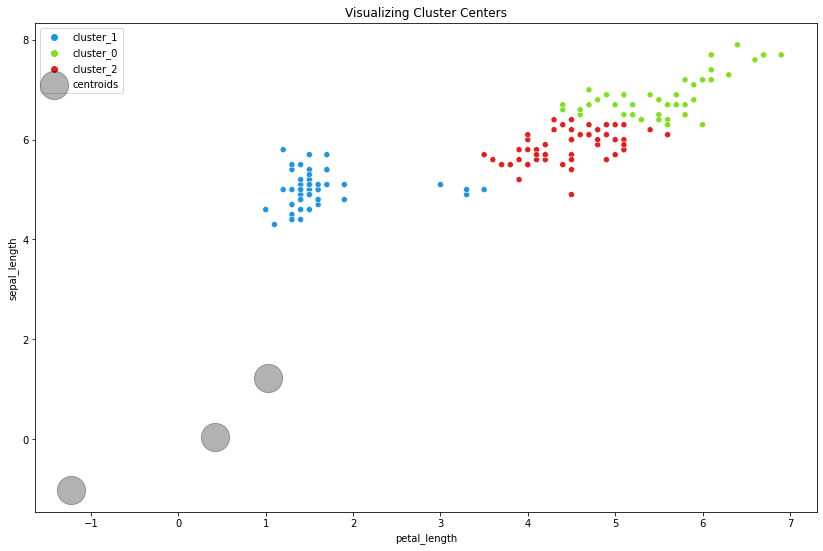

In [40]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();



In [41]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

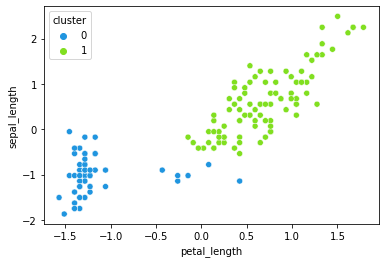

In [42]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')

In [43]:
kmeans.inertia_

84.72073862193372

In [44]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

84.72073862193372

In [45]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

43.034691996034674

In [46]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

28.486372225447568

In [48]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

22.395986080151957

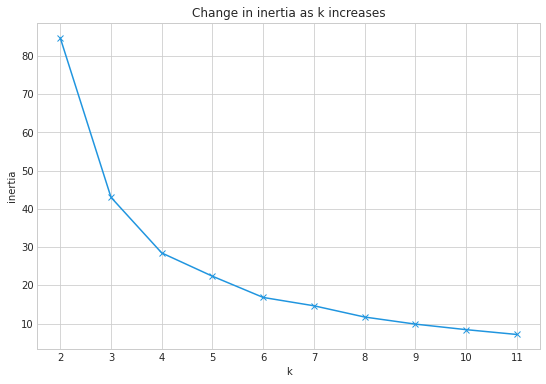

In [49]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

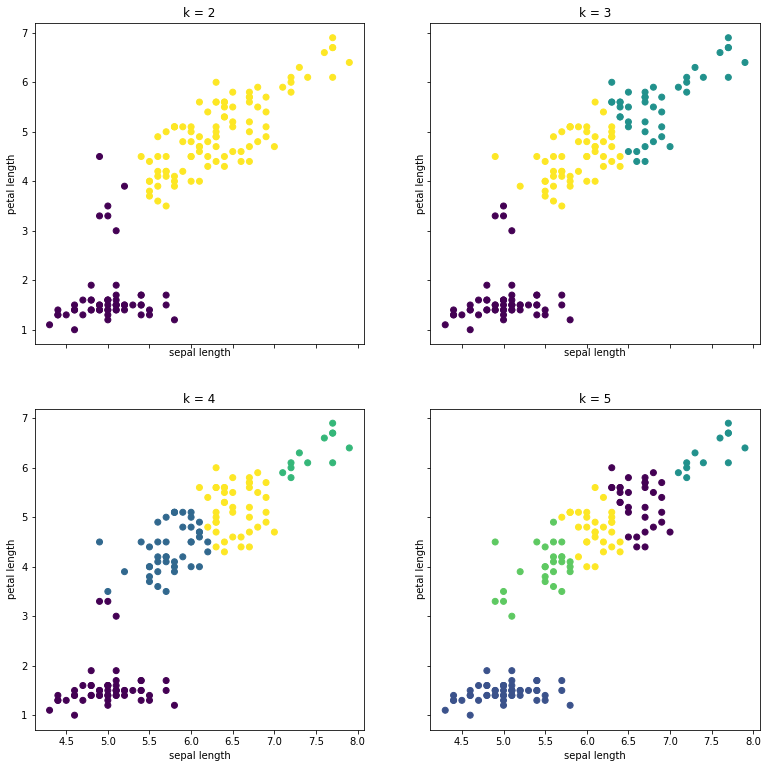

In [50]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [51]:
def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

In [52]:
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

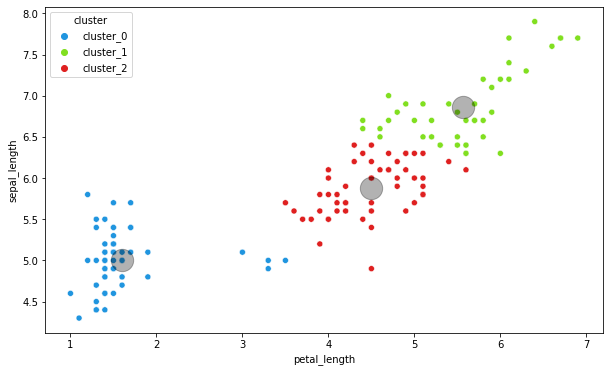

In [53]:
create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [69]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

df = get_mallcustomer_data()

In [70]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [71]:
df.shape

(200, 4)

In [72]:
X = df[['annual_income','spending_score']]
X.head()

,annual_income,spending_score
customer_id,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [73]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns).set_index([X.index.values])

In [74]:
X_scaled.head()

,annual_income,spending_score
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


In [75]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [77]:
df['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,0
3,Female,20,16,6,1
4,Female,23,16,77,0
5,Female,31,17,40,1


In [78]:
df.sample(10)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
108,Male,54,63,46,1
11,Male,67,19,14,1
117,Female,63,65,43,1
20,Female,35,23,98,0
2,Male,21,15,81,0
122,Female,38,67,40,1
149,Female,34,78,22,1
10,Female,30,19,72,0
176,Female,30,88,86,0


In [79]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,spending_score
0,0.173647,1.159309
1,-0.081716,-0.545557


In [80]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['annual_income','spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,65.109375,80.062500
1,58.419118,36.147059


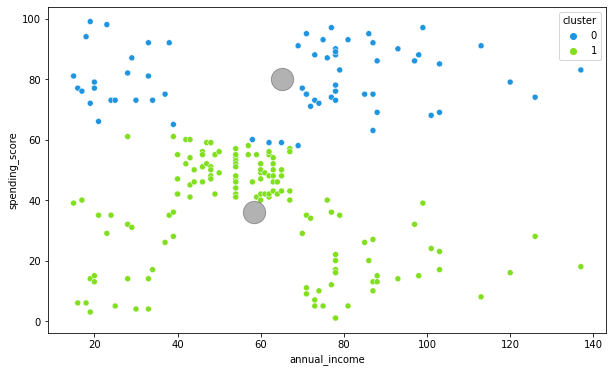

In [81]:
create_scatter_plot('annual_income','spending_score',df.iloc[:,2:5],kmeans, X_scaled.iloc[:,:2], scaler)

In [82]:
mall, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)

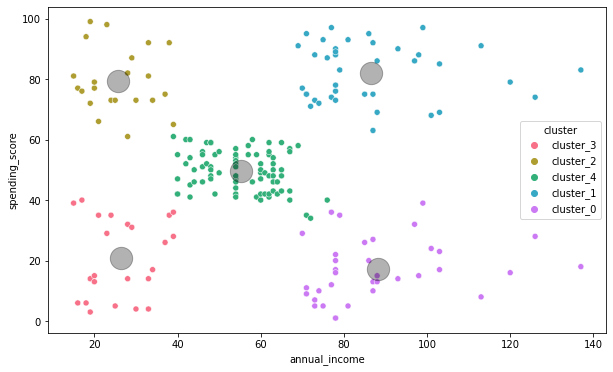

In [83]:
create_scatter_plot('annual_income','spending_score',mall,kmeans, X_scaled, scaler)

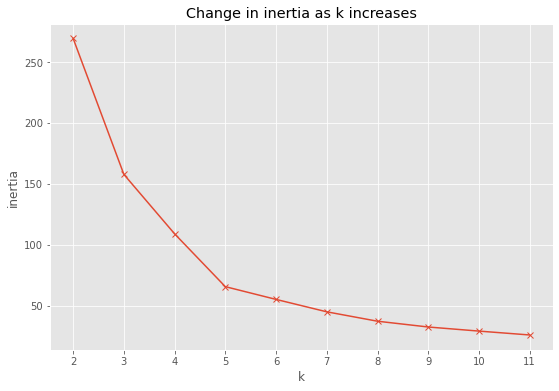

In [93]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled.iloc[:,:2]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 3. How does scaling impact the results of clustering?

   * Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [94]:
def create_cluster_unscaled(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    #scaler = StandardScaler(copy=True).fit(X)
    #X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X)
    kmeans.predict(X)
    train['cluster'] = kmeans.predict(X)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    return train, X, scaler, kmeans, centroids

def create_scatter_plot_unscaled(x,y,train,kmeans, X):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='red')


In [95]:
mall, X, scaler, kmeans, centroids = create_cluster_unscaled(df, X, 5)

In [96]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

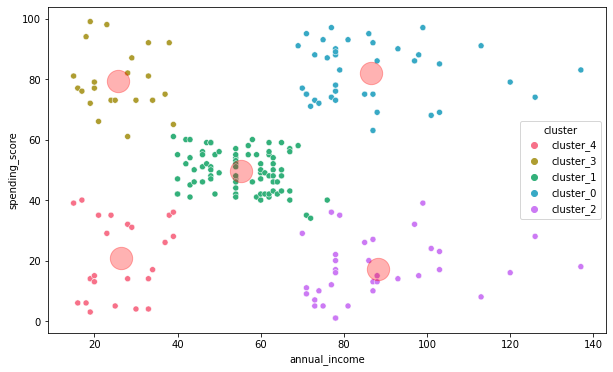

In [97]:
create_scatter_plot_unscaled('annual_income','spending_score',mall,kmeans, X)